In [1]:
import datetime
from matplotlib import pyplot as plt
from redvox.api1000.wrapped_redvox_packet.wrapped_packet import WrappedRedvoxPacketM
from redvox.common.data_window import DataWindow, DataWindowConfig
import pandas as pd
import datetime
from matplotlib import pyplot as plt
from redvox.api1000.wrapped_redvox_packet.wrapped_packet import WrappedRedvoxPacketM
from redvox.common.data_window import DataWindow, DataWindowConfig
import pandas as pd
from scipy.io.wavfile import write
import sys
import re
import shutil
import os
import csv
import datetime
import numpy as np
from research.dataImporting import dataTools
from scipy.io.wavfile import write
import sys
import re
import shutil
import os
import csv
import datetime
import numpy as np
from research.dataImporting import dataTools

# Grab Drone GPS data

In [9]:
parent_directory=os.path.abspath(os.path.join(os.getcwd(), ".."))
path__=parent_directory+"\\flight_directories\\A1_A2_A3_flight_directory.csv"
def readDirectoryCSV(path):
    file = open(path)
    csvreader = csv.reader(file)
    rows = []
    startTimes = []
    endTimes = []
    fileNames = []
    runNames = []
    for row in csvreader:
        rows.append(row)

    for entry in range(len(rows)):
        run = entry[2]
        scene = entry[1]
        passNum = entry[0]
        start = entry[3].split('_')
        end = entry[5].split('_')
        date = start[0][6:8]
        startTime = start[1]
        endTime = end[1]
        fileName = entry[7]
        startTimes.append(startTime)
        endTimes.append(endTime)
        fileNames.append(fileName)
        runNames.append((scene + 'R' + run + 'P' + passNum).strip())
    return [runNames, startTimes, endTimes, fileNames]


def getDroneGPSData(fileName, start, end):
    start_time=datetime.datetime(2021, 8, int(start[6:8]), int(start[9:11]), int(start[11:13]),int(start[13:15])).timestamp()
    stop_time=datetime.datetime(2021, 8, int(end[6:8]), int(end[9:11]), int(end[11:13]),int(end[13:15])).timestamp()
    first=True
    if fileName[0]== 'F':
        FLY=True
    else:
        FLY=False
    GPS_flight_log=pd.read_csv(("C:\\Users\\rclendening\\researchData\\ESCAPE II_AFRL_SSD\\UAS Campaign\\UAS_log_files\\A1_A2_A3"+"\\"+fileName+".csv"))
    print("C:\\Users\\rclendening\\researchData\\ESCAPE II_AFRL_SSD\\UAS Campaign\\UAS_log_files\\A1_A2_A3"+"\\"+fileName+".csv")
    if FLY:
        lon=GPS_flight_log.iloc[:,4]
        offsets=GPS_flight_log.iloc[:,1]
        lat=GPS_flight_log.iloc[:,5]
        time=GPS_flight_log.iloc[:,7]
        date=GPS_flight_log.iloc[:,8]
        height=GPS_flight_log.iloc[:,9]
    else:
        lon=GPS_flight_log.iloc[:,3]/10**7
        lat=GPS_flight_log.iloc[:,2]/10**7
        time_UTC=GPS_flight_log.iloc[:,1]/10**6
        #height=GPS_flight_log.iloc[:,5]/10**3
        height=GPS_flight_log.iloc[:,4]/10**3
    lat_dat=[]
    lon_dat=[]
    time_dat=[]
    for x in range(len(lat)):
        if FLY:
            if np.isnan(time[x]):
                cur_time=0
            else:
                if first:
                    offset=offsets[x]
                    first=False
                    offset_time=datetime.datetime(2021, 8, int(start[6:8]), int(str(time[x])[0:2])-4,int(str(time[x])[2:4]),int(str(time[x])[4:6])).timestamp()
                cur_time=offset_time+abs(offsets[x]-offset)
        else:
            cur_time=time_UTC[x]
        if  start_time <= cur_time< stop_time:
            lat_dat.append(lat[x])
            lon_dat.append(lon[x])
            time_dat.append(cur_time)

    return {"lat": lat_dat, "long": lon_dat, "time": time_dat}


#flightDetails = readDirectoryCSV(path__)
flightDetails=pd.read_csv(path__)
x = 0
GPSCords=getDroneGPSData(fileName="log_18_2021-8-24-11-04-46_vehicle_gps_position_0", start="20210824_104700", end="20210824_104815")

C:\Users\rclendening\researchData\ESCAPE II_AFRL_SSD\UAS Campaign\UAS_log_files\A1_A2_A3\log_18_2021-8-24-11-04-46_vehicle_gps_position_0.csv


# Grab Cell GPS Data

In [8]:
def convertToGPS(path,name):
    window = dataTools.import_redVoxData(path)
    station = window.first_station()
    locationSensor = station.best_location_sensor()
    if locationSensor:
        lat=locationSensor._data.columns[3]
        lon=locationSensor._data.columns[4]
        alt=locationSensor._data.columns[5]
        phoneGPS.append([name,np.mean(lat),np.mean(lon),np.mean(alt)])


def searchDir(rootdir):
    it = 0
    for it in os.scandir(rootdir):
        if it.is_dir():
            # print(it.path)
            searchDir(it)
        else:
            it = os.path.dirname(it)
            break
    if isinstance(it, str):
        splitPath = it.split('\\')
        convertToGPS(it,splitPath[8])
phoneGPS=[]
searchDir(r"C:\Users\rclendening\researchData\Unused_Datasets\EscapeCell_Data\A2\A2R1P1")
GPS_df=pd.DataFrame(phoneGPS, columns=['Name','Lat','Lon','Alt'])
#GPS_df.to_csv('./all_phone_gps_SF.csv')
print()
GPS_df.set_index("Name", inplace = True)

# Plot image of test scenario

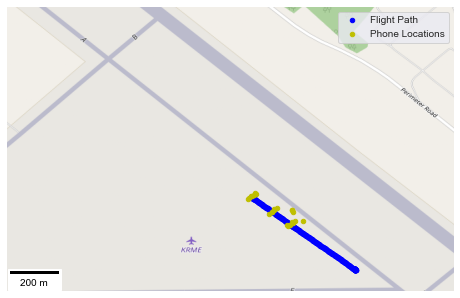

In [10]:
from PIL import Image
from matplotlib.transforms import Affine2D
import matplotlib.patches as mpatches
from matplotlib_scalebar.scalebar import ScaleBar

cluster_1=["Phone_6-2","Phone_29","Phone_8","Phone_2-4","Phone_1-1","Phone_12","Phone_6-3","Phone_27"]
cluster_2=["Phone_7-1","Phone_5-4","Phone_2-3","Phone_3-1","Phone_15","Phone_10","Phone_1-3","Phone_6-4"]
cluster_3=["Phone_28","Phone_3-5","Phone_3-4","Phone_3-2","Phone_2-5","Phone_5-3","Phone_30","Phone_6-5","Phone_11","Phone_5-2","Phone_9","Phone_7-2"]
phonesLat_1=[]
phonesLon_1=[]
phonesLat_2=[]
phonesLon_2=[]
phonesLat_3=[]
phonesLon_3=[]
for index,row in GPS_df.iterrows():
    phonesLat_1.append(row["Lat"])
    phonesLon_1.append(row["Lon"])
BBox = [-75.4300, -75.4036, 43.2257, 43.2435]
mymap = plt.imread(r"C:\Users\rclendening\Downloads\map2.png") # or entitled "EscapeII_info\\DataCollection_GPS.png
# phonesLat_1=np.array(GPS_df['Lat'])
# phonesLon_1=np.array(GPS_df['Lon'])
# phonesLat_2=np.array(GPS_df['Lat'][10:20])
# phonesLon_2=np.array(GPS_df['Lon'][10:20])
# phonesLat_3=np.array(GPS_df['Lat'][20:])
# phonesLon_3=np.array(GPS_df['Lon'][20:])
fig, ax = plt.subplots(figsize=(8, 7))

# ax.scatter(x=-75.41115853999112, y=43.23216145008466,marker="*", zorder=1, alpha=1, c='r',
#            s=100, label="CoM")

# ax.scatter(x=GPSCords['long'], y=GPSCords['lat'], zorder=1, alpha=1, c='y',
#            s=20, label="Phone Locations")
# ax.scatter(x=0, y=0, zorder=1, alpha=1, c='b',
#            s=20, label="Flight Path")
# for x in range(len(phonesLat_1)):
#     circle=plt.Circle(xy=(phonesLon_1[x], phonesLat_1[x]), radius=0.00072, color='red', fill=True)
#     ax.add_patch(circle)
# circle=plt.Circle(xy=(phonesLon_1[0], phonesLat_1[0]), radius=0.00072, color='red', fill=True)
# ax.add_patch(circle)
ax.scatter(x=GPSCords['long'], y=GPSCords['lat'], zorder=1, alpha=1, c='b',
           s=20, label="Flight Path")
ax.scatter(x=GPS_df["Lon"], y=GPS_df["Lat"], zorder=1, alpha=1, c='y',
           s=20, label="Phone Locations")

#circle=plt.scatter(x=0, y=0,color='red', label="80m Detection Area")
# ax.scatter(x=phonesLon_2, y=phonesLat_2, zorder=1, alpha=1, c='w',
#             s=20,label="Cluster #2")
# ax.scatter(x=phonesLon_3, y=phonesLat_3, zorder=1, alpha=1, c='g',
#             s=20,label="Cluster #3")

# circle=plt.Circle(xy=(phonesLon_1[0], phonesLat_1[0]), radius=0.00072, color='red', fill=False, label="80m Detection Area")
# ax.add_patch(circle)
# ax.scatter(x=phonesLon_1[0], y=phonesLat_1[0], zorder=1, alpha=1, c='red',
#            s=20, label="80m Detection Area")
# ax.scatter(x=phonesLon_1[0], y=phonesLat_1[0], zorder=1, alpha=1, c='y',
#            s=20)
#circle1 = plt.Circle(xy=(phonesLon_1[0], phonesLat_1[0]), radius=0.00072, color='red', fill=False, label="Detection Radius")
#ax.add_patch(circle1)
#ax.set_title('Plotting Spatial Data on Escape II Flight Path')
# ax.set_xlim(BBox[0]+.0055, BBox[1])
# ax.set_ylim(BBox[2]+.0025, BBox[3]-.0025)
ax.set_xlim(BBox[0]+.009, BBox[1]-.002)
ax.set_ylim(BBox[2]+.004, BBox[3]-.004)
scalebar=ScaleBar(120000,"m",length_fraction=0.15,fixed_value=200,fixed_units="m",location="lower left")
plt.gca().add_artist(scalebar)
plt.legend()
#plt.axis('equal')
ax.set_aspect("equal",adjustable='box')
#ax.grid(True)
#ax.patch.set_edgecolor('black')
# ax.patch.set_linewidth('3')
# ax.tick_params(axis='both')
mymap
plt.axis("off")
ax.imshow(mymap, zorder=0, extent=BBox, aspect='equal')
plt.savefig("sf_scenario.pdf",dpi=1200,bbox_inches="tight")

Storing distance of each cell phone from drone in CSV

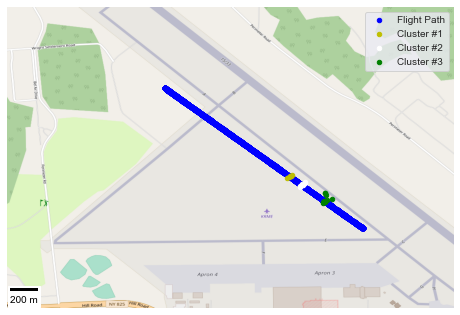

In [152]:
from PIL import Image
from matplotlib.transforms import Affine2D
import matplotlib.patches as mpatches
import ffmpeg
cluster_1=["Phone_6-2","Phone_29","Phone_8","Phone_2-4","Phone_1-1","Phone_12","Phone_6-3","Phone_27"]
cluster_2=["Phone_7-1","Phone_5-4","Phone_2-3","Phone_3-1","Phone_15","Phone_10","Phone_1-3","Phone_6-4"]
cluster_3=["Phone_28","Phone_3-5","Phone_3-4","Phone_3-2","Phone_2-5","Phone_5-3","Phone_30","Phone_6-5","Phone_11","Phone_5-2","Phone_9","Phone_7-2"]
phonesLat_1=[]
phonesLon_1=[]
phonesLat_2=[]
phonesLon_2=[]
phonesLat_3=[]
phonesLon_3=[]
for index,row in GPS_df.iterrows():
    if index in cluster_1:
        phonesLat_1.append(row["Lat"])
        phonesLon_1.append(row["Lon"])
    if index in cluster_2:
        phonesLat_2.append(row["Lat"])
        phonesLon_2.append(row["Lon"])
    if index in cluster_3:
        phonesLat_3.append(row["Lat"])
        phonesLon_3.append(row["Lon"])

from matplotlib_scalebar.scalebar import ScaleBar
BBox = [-75.4300, -75.4036, 43.2257, 43.2435]
mymap = plt.imread("data_collection.png")
# phonesLat_1=np.array(GPS_df['Lat'])
# phonesLon_1=np.array(GPS_df['Lon'])
# phonesLat_2=np.array(GPS_df['Lat'][10:20])
# phonesLon_2=np.array(GPS_df['Lon'][10:20])
# phonesLat_3=np.array(GPS_df['Lat'][20:])
# phonesLon_3=np.array(GPS_df['Lon'][20:])
fig, ax = plt.subplots(figsize=(8, 7))

# ax.scatter(x=-75.41115853999112, y=43.23216145008466,marker="*", zorder=1, alpha=1, c='r',
#            s=100, label="CoM")

# ax.scatter(x=GPSCords['long'], y=GPSCords['lat'], zorder=1, alpha=1, c='y',
#            s=20, label="Phone Locations")
ax.scatter(x=GPSCords['long'], y=GPSCords['lat'], zorder=1, alpha=1, c='b',
           s=20, label="Flight Path")
ax.scatter(x=phonesLon_1, y=phonesLat_1, zorder=1, alpha=1, c='y',
           s=20, label="Cluster #1")
ax.scatter(x=phonesLon_2, y=phonesLat_2, zorder=1, alpha=1, c='w',
            s=20,label="Cluster #2")
ax.scatter(x=phonesLon_3, y=phonesLat_3, zorder=1, alpha=1, c='g',
            s=20,label="Cluster #3")
for x in range(len(phonesLat_1)):
    circle=plt.Circle(xy=(phonesLon_1[x], phonesLat_1[x]), radius=0.00072, color='red', fill=False)
    ax.add_patch(circle)
# circle=plt.Circle(xy=(phonesLon_1[0], phonesLat_1[0]), radius=0.00072, color='red', fill=False, label="80m Detection Area")
# ax.add_patch(circle)
# ax.scatter(x=phonesLon_1[0], y=phonesLat_1[0], zorder=1, alpha=1, c='red',
#            s=20, label="80m Detection Area")
# ax.scatter(x=phonesLon_1[0], y=phonesLat_1[0], zorder=1, alpha=1, c='y',
#            s=20)
#circle1 = plt.Circle(xy=(phonesLon_1[0], phonesLat_1[0]), radius=0.00072, color='red', fill=False, label="Detection Radius")
#ax.add_patch(circle1)
#ax.set_title('Plotting Spatial Data on Escape II Flight Path')
# ax.set_xlim(BBox[0]+.0055, BBox[1])
# ax.set_ylim(BBox[2]+.0025, BBox[3]-.0025)
ax.set_xlim(BBox[0]+.009, BBox[1]-.002)
ax.set_ylim(BBox[2]+.004, BBox[3]-.004)
scalebar=ScaleBar(120000,"m",length_fraction=0.15,fixed_value=200,fixed_units="m",location="lower left")
plt.gca().add_artist(scalebar)
plt.legend()
#plt.axis('equal')
ax.set_aspect("equal",adjustable='box')
#ax.grid(True)
#ax.patch.set_edgecolor('black')
# ax.patch.set_linewidth('3')
# ax.tick_params(axis='both')
mymap
plt.axis("off")
ax.imshow(mymap, zorder=0, extent=BBox, aspect='equal')
#plt.savefig("lf_scenario_detection.pdf",dpi=1200,bbox_inches="tight")

In [10]:
truth_data=pd.read_csv("csvs\R6P2_truth.csv")
indiv_data=pd.read_csv("csvs\R6P2_truth_v2.csv")

# Animation of EVP

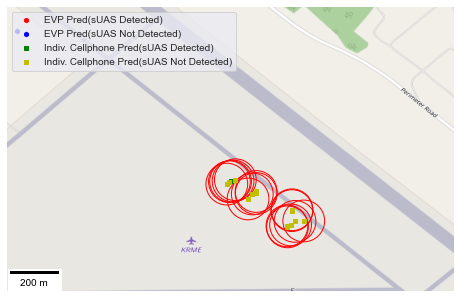

In [15]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import numpy as np
import ffmpeg
BBox = [-75.4300, -75.4036, 43.2257, 43.2435]
mymap = plt.imread("data_collection.png")
usable_phones_lat=[]
usable_phones_lon=[]
names=[]
mymap = plt.imread("data_collection.png")
count=0
for index,row in GPS_df.iterrows():
    if index in indiv_data.columns:
        names.append(index)
        usable_phones_lat.append(row["Lat"])
        usable_phones_lon.append(row["Lon"])
# creating a blank window
# for the animation
fig = plt.figure(figsize=(7,7))
fig.set_size_inches(8, 6, forward=True)
ax = plt.axes(xlim=(BBox[0]+.009, BBox[1]-.002),ylim=(BBox[2]+.004, BBox[3]-.004))
plt.rcParams['animation.ffmpeg_path'] = "C:\\FFmpeg\\bin\\ffmpeg.exe"
ax.scatter(x=[0], y=[0], zorder=1, alpha=1, c='r',
           s=20, label="EVP Pred(sUAS Detected)",marker='^')
ax.scatter(x=[0], y=[0], zorder=1, alpha=1, c='b',
           s=20,label="EVP Pred(sUAS Not Detected)",marker='^')
ax.scatter(x=[0], y=[0], zorder=1, alpha=1, c='g',
           s=20,label="Indiv. Cellphone Pred(sUAS Detected)")
ax.scatter(x=[0], y=[0], zorder=1, alpha=1, c='y',
           s=20, label="Indiv. Cellphone Pred(sUAS Not Detected)")
truth_data_splits=len(GPSCords['long'])/len(truth_data)
# initializing empty values
# for x and y co-ordinates
xdata, ydata = [], []

# animation function
def animate(i):
    ax.clear()
    ax.set_xlim(BBox[0]+.009, BBox[1]-.002)
    ax.set_ylim(BBox[2]+.004, BBox[3]-.004)
    ax.scatter(x=[0], y=[0], zorder=1, alpha=1, c='r',
               s=20, label="EVP Pred(sUAS Detected)",marker='h')
    ax.scatter(x=[0], y=[0], zorder=1, alpha=1, c='b',
               s=20,label="EVP Pred(sUAS Not Detected)",marker='h')
    ax.scatter(x=[0], y=[0], zorder=1, alpha=1, c='g',marker='s',
               s=20,label="Indiv. Cellphone Pred(sUAS Detected)")
    ax.scatter(x=[0], y=[0], zorder=1, alpha=1, c='y',marker='s',
               s=20, label="Indiv. Cellphone Pred(sUAS Not Detected)")
    longitudes=[]
    latitudes=[]
    colors=[]
    longitudes.extend(usable_phones_lon)
    longitudes.append(GPSCords['long'][i])
    latitudes.extend(usable_phones_lat)
    latitudes.append(GPSCords['lat'][i])
    count=0
    for x in range(len(usable_phones_lon)):
        circle=plt.Circle(xy=(usable_phones_lon[x], usable_phones_lat[x]), radius=0.00072, color='red', fill=False)
        ax.add_patch(circle)
    for x in names:
        if indiv_data[x][int(i/truth_data_splits)]==0:
           # colors.append('y')
            indiv_color='y'
        else:
            #colors.append('g')
            indiv_color='g'
        ax.scatter(x=usable_phones_lon[count], y=usable_phones_lat[count],zorder=1, alpha=1, c=indiv_color,
           s=10,marker='s')
        count+=1
    if truth_data.iloc[int(i/truth_data_splits)][1]==0:
        # colors.append('b')
        uas_color='b'
    else:
        # colors.append('r')
        uas_color='r'
    ax.scatter(x=GPSCords['long'][i], y=GPSCords['lat'][i], zorder=1, alpha=1, c=uas_color,
           s=20,marker='h')
    plt.imshow(mymap,zorder=0,extent=BBox, aspect='equal')
    scalebar=ScaleBar(120000,"m",length_fraction=0.15,fixed_value=200,fixed_units="m",location="lower left")
    plt.gca().add_artist(scalebar)
    ax.legend(loc="upper left")
    plt.axis("off")
    # update=np.array([longitudes,latitudes]).T
    # scat.set_offsets(update)
    # scat.set_color(colors)
# ax.legend(loc="upper left")
# plt.axis("off")
#
# scalebar=ScaleBar(120000,"m",length_fraction=0.15,fixed_value=200,fixed_units="m",location="lower left")
# plt.gca().add_artist(scalebar)
anim = animation.FuncAnimation(fig, animate, frames=len(GPSCords["lat"]))#len(GPSCords["lat"])
anim.save('EVP_demo_A3R6P2_wIndiv_v2.mp4', writer = 'ffmpeg', fps = 30,dpi=250)

# 3D Scatterplot

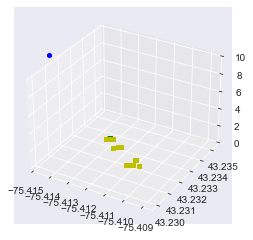

In [175]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import ffmpeg
import cv2

# Read the image with Opencv
img = cv2.imread("data_collection.png")
# Change the color from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
x, y = np.ogrid[0:img.shape[0], 0:img.shape[1]]
x=np.linspace(BBox[1]-.002,BBox[0]+.009,len(x))
y=np.linspace(BBox[2]+.004, BBox[3]-.004,len(y.T))
y=np.reshape(y,[1,len(y)])
x=np.reshape(x,[len(x),1])
# In Python3 matplotlib assumes rgbdata in range 0.0 to 1.0
# In Python3 matplotlib assumes rgbdata in range 0.0 to 1.0
img = img.astype('float32')/255
BBox = [-75.4300, -75.4036, 43.2257, 43.2435]
mymap = plt.imread("data_collection.png")
usable_phones_lat=[]
usable_phones_lon=[]
names=[]
count=0
for index,row in GPS_df.iterrows():
    if index in indiv_data.columns:
        names.append(index)
        usable_phones_lat.append(row["Lat"])
        usable_phones_lon.append(row["Lon"])
# creating a blank window
# for the animation
#fig = plt.figure(figsize=(7,7))
# fig.set_size_inches(8, 6, forward=True)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim(BBox[0]+.009, BBox[1]-.002)
ax.set_ylim(BBox[2]+.004, BBox[3]-.004)
ax.set_zlim(0,40)
#ax = plt.axes(xlim=(BBox[0]+.009, BBox[1]-.002),ylim=(BBox[2]+.004, BBox[3]-.004))
plt.rcParams['animation.ffmpeg_path'] = "C:\\FFmpeg\\bin\\ffmpeg.exe"
ax.scatter(xs=[0], ys=[0],zs=[0], zorder=1, alpha=1, c='r',
           s=20, label="EVP Pred(sUAS Detected)",marker='h')
ax.scatter(xs=[0], ys=[0],zs=[0], zorder=1, alpha=1, c='b',
           s=20,label="EVP Pred(sUAS Not Detected)",marker='h')
ax.scatter(xs=[0], ys=[0],zs=[0], zorder=1, alpha=1, c='g',marker='s',
           s=20,label="Indiv. Cellphone Pred(sUAS Detected)")
ax.scatter(xs=[10], ys=[0],zs=[0], zorder=1, alpha=1, c='y',marker='s',
           s=20, label="Indiv. Cellphone Pred(sUAS Not Detected)")
truth_data_splits=len(GPSCords['long'])/len(truth_data)

# animation function
def animate(i):
    ax.clear()
    ax.set_xlim(BBox[0]+.015, BBox[1]-.005)
    ax.set_ylim(BBox[2]+.004, BBox[3]-.008)
    ax.set_zlim(0,10)
    # ax.plot_surface(x, y,np.atleast_2d(0) , rstride=10, cstride=10,zorder=1,alpha=0.1, facecolors=img)
    ax.scatter(xs=[0], ys=[0],zs=[0], zorder=1, alpha=1, c='r',
               s=20, label="EVP Pred(sUAS Detected)",marker='h')
    ax.scatter(xs=[0], ys=[0],zs=[0], zorder=1, alpha=1, c='b',
               s=20,label="EVP Pred(sUAS Not Detected)",marker='h')
    ax.scatter(xs=[0], ys=[0],zs=[0], zorder=1, alpha=1, c='g',marker='s',
               s=20,label="Indiv. Cellphone Pred(sUAS Detected)")
    ax.scatter(xs=[0], ys=[0],zs=[0], zorder=1, alpha=1, c='y',marker='s',
               s=20, label="Indiv. Cellphone Pred(sUAS Not Detected)")
    longitudes=[]
    latitudes=[]
    longitudes.extend(usable_phones_lon)
    longitudes.append(GPSCords['long'][i])
    latitudes.extend(usable_phones_lat)
    latitudes.append(GPSCords['lat'][i])
    count=0
    for name in names:
        if indiv_data[name][int(i/truth_data_splits)]==0:
           # colors.append('y')
            indiv_color='y'
        else:
            #colors.append('g')
            indiv_color='g'
        ax.scatter(xs=usable_phones_lon[count], ys=usable_phones_lat[count],zs=[0],zorder=10, alpha=1, c=indiv_color,
           s=20,marker='s')
        count+=1
    if truth_data.iloc[int(i/truth_data_splits)][1]==0:
        # colors.append('b')
        uas_color='b'
    else:
        # colors.append('r')
        uas_color='r'
    ax.scatter(xs=GPSCords['long'][i], ys=GPSCords['lat'][i],zs=[0.5], zorder=2, alpha=1, c=uas_color,
           s=20,marker='h')

    #plt.imshow(mymap,zorder=0,extent=BBox, aspect='equal')
    # scalebar=ScaleBar(120000,"m",length_fraction=0.15,fixed_value=200,fixed_units="m",location="lower left")
    # plt.gca().add_artist(scalebar)
    # ax.legend(loc="upper left")
    # plt.axis("off")
    # update=np.array([longitudes,latitudes]).T
    # scat.set_offsets(update)
    # scat.set_color(colors)
# ax.legend(loc="upper left")
# plt.axis("off")
#
# scalebar=ScaleBar(120000,"m",length_fraction=0.15,fixed_value=200,fixed_units="m",location="lower left")
# plt.gca().add_artist(scalebar)
anim = animation.FuncAnimation(fig, animate, frames=len(GPSCords["lat"]))#len(GPSCords["lat"])
anim.save('test123.mp4', writer = 'ffmpeg', fps = 30)

In [179]:
import numpy as np
import redvox.common.io as rdvx_io
import redvox.common.date_time_utils as dt_utils
from typing import TYPE_CHECKING, List, Optional
from redvox.api1000.wrapped_redvox_packet.wrapped_packet import WrappedRedvoxPacketM
from redvox.api1000.wrapped_redvox_packet.sensors.sensors import Sensors
from redvox.api1000.wrapped_redvox_packet.sensors.audio import Audio
from redvox.api1000.common.common import SamplePayload, SummaryStatistics
read_res: rdvx_io.Index = rdvx_io.index_unstructured(r"C:\Users\rclendening\researchData\ESCAPE_August_fresh\Day1_23_Aug_2021\Flight_Line_A\Position_2\Phone_29\1500")
packets: List['WrappedRedvoxPacketM'] = read_res.get_index_for_station_id("829").read()

In [181]:
packet: 'WrappedRedvoxPacketM' = packets[0]
sensors: 'Sensors' = packet.get_sensors()
audio_sensor: Optional['Audio'] = sensors.get_audio()
print(audio_sensor.get_bits_of_precision())

24.0
